# Econophysics I
## Exercise 02 - H04

### Juan Camilo Henao Londono
### Universität Duisburg-Essen
28.04.2020

In [15]:
# Function to ensure the particular file dependencies are available and import them from next cell. Run both. 
def install():
    try: 
        import numpy as np
        from matplotlib import pyplot as plt
    except: 
        !pip install numpy matplotlib
        install()    

In [16]:
install()
import numpy as np
from matplotlib import pyplot as plt

## Exercise 02. Homework 04. Point 02

Especially for the case $\gamma = 1$, calculate the probability for $|x| \ge 10$, $|x| \ge 100$, $|x| \ge 1 000$ and for $|x| \ge 10 000$. Are extreme outliers likely?

We can use the analytical solution

$$P^{(C)}\left(|x| \ge u\right) = 1-\frac{2}{\pi}\tan^{-1}\left(\frac{u}{\gamma}\right)$$

or the rough solution

$$P^{(C)}_{app}\left(|x| \ge u\right) = \frac{2\gamma}{\pi u}$$

In [17]:
def cauchy_dist_analytic(u, gamma):
    return 1 - (2 / np.pi) * np.arctan(u / gamma)

In [18]:
def cauchy_dist_rough(u, gamma):
    return (2 * gamma) / (np.pi * u)

In [19]:
# Initial values

u_values = [10, 100, 1000, 10000]
gamma = 1

for u in u_values:
    
    analytic = cauchy_dist_analytic(u, gamma)
    rough = cauchy_dist_rough(u, gamma)
    
    error = np.abs(analytic - rough) / analytic
    
    print(f'u = {u}, gamma = {gamma}')
    print(f'Cauchy distribution (analytic) = {analytic :0.7e}')
    print(f'Cauchy distribution (rough) = {rough :0.7e}')
    print(f'Error approximation = {error * 100:0.7f}%')
    print()

u = 10, gamma = 1
Cauchy distribution (analytic) = 6.3451035e-02
Cauchy distribution (rough) = 6.3661977e-02
Error approximation = 0.3324491%

u = 100, gamma = 1
Cauchy distribution (analytic) = 6.3659855e-03
Cauchy distribution (rough) = 6.3661977e-03
Error approximation = 0.0033332%

u = 1000, gamma = 1
Cauchy distribution (analytic) = 6.3661956e-04
Cauchy distribution (rough) = 6.3661977e-04
Error approximation = 0.0000333%

u = 10000, gamma = 1
Cauchy distribution (analytic) = 6.3661977e-05
Cauchy distribution (rough) = 6.3661977e-05
Error approximation = 0.0000003%



In [20]:
def lorentz_cauchy_distribution(gamma, x):
    return (gamma / np.pi) * (1 / (x * x + gamma * gamma))

In [21]:
def gaussian_distribution(mean, variance, x):
    return (1 / (2 * np.pi * variance) ** 0.5) * np.exp(-((x - mean) ** 2) / (2 * variance))

In [22]:
# Initial values

gamma = 1
mean = 0
variance = 1

x = np.arange(-10, 10, 0.001)
cauchy = lorentz_cauchy_distribution(gamma, x)
gaussian = gaussian_distribution(mean, variance, x)

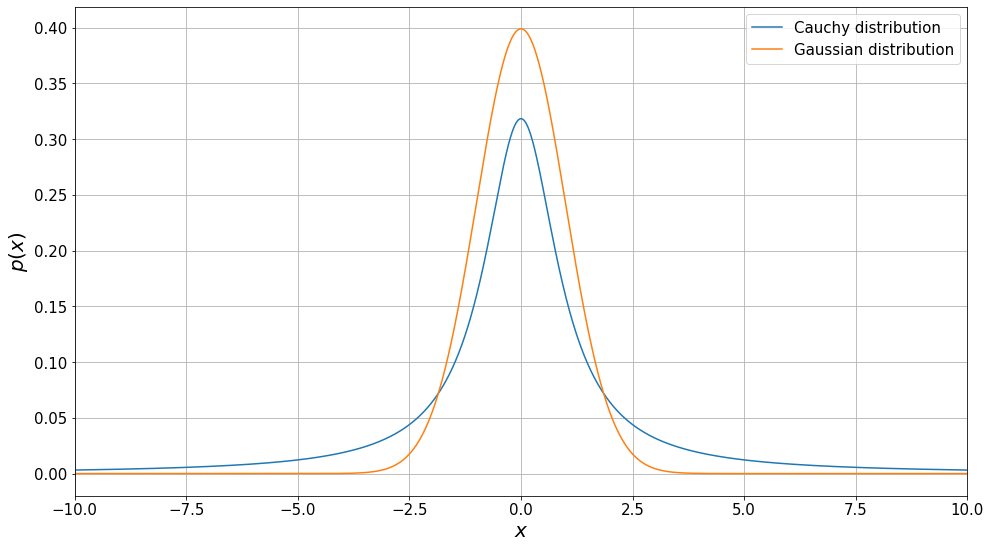

In [23]:
# Plot

fig = plt.figure(figsize=(16,9))

plt.plot(x, cauchy, label='Cauchy distribution')
plt.plot(x, gaussian, label='Gaussian distribution')

# Figure details
plt.legend(loc='best')
plt.xlim(-10, 10)
plt.legend(loc='best', fontsize=15)
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$p\left( x \right)$', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)